<a href="https://colab.research.google.com/github/gustavogit4/regressao-linear-propaganda/blob/main/Projeto_de_modelo_estat%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de modelo estatístico**

### **Etapa 1: Importação de bibliotecas e da base de dados**

 **Objetivo:** Preparar o ambiente com as bibliotecas necessárias e carregar os dados do arquivo propaganda.csv

**Bibliotecas essenciais:**

In [ ]:

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e Regressão
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Avaliação de modelos (sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Importando os dados:**

In [ ]:
# Carregando o dataset
df = pd.read_csv('propaganda.csv')

# Visualizando as primeiras linhas
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### **Etapa 2: Análise Exploratória dos Dados (EDA)**

**Objetivo:** Explorar o dataset para compreender a estrutura dos dados, tipos de variáveis, identificar padrões, detectar outliers, e observar possíveis relações entre as variáveis.

2.1 **Informações gerais do dataset**

In [ ]:
# Verificando o formato do dataset
df.shape

# Tipos de variáveis e valores ausentes
df.info()

# Estatísticas descritivas das variáveis numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


2.2 **Visualização da distribuição das variáveis**

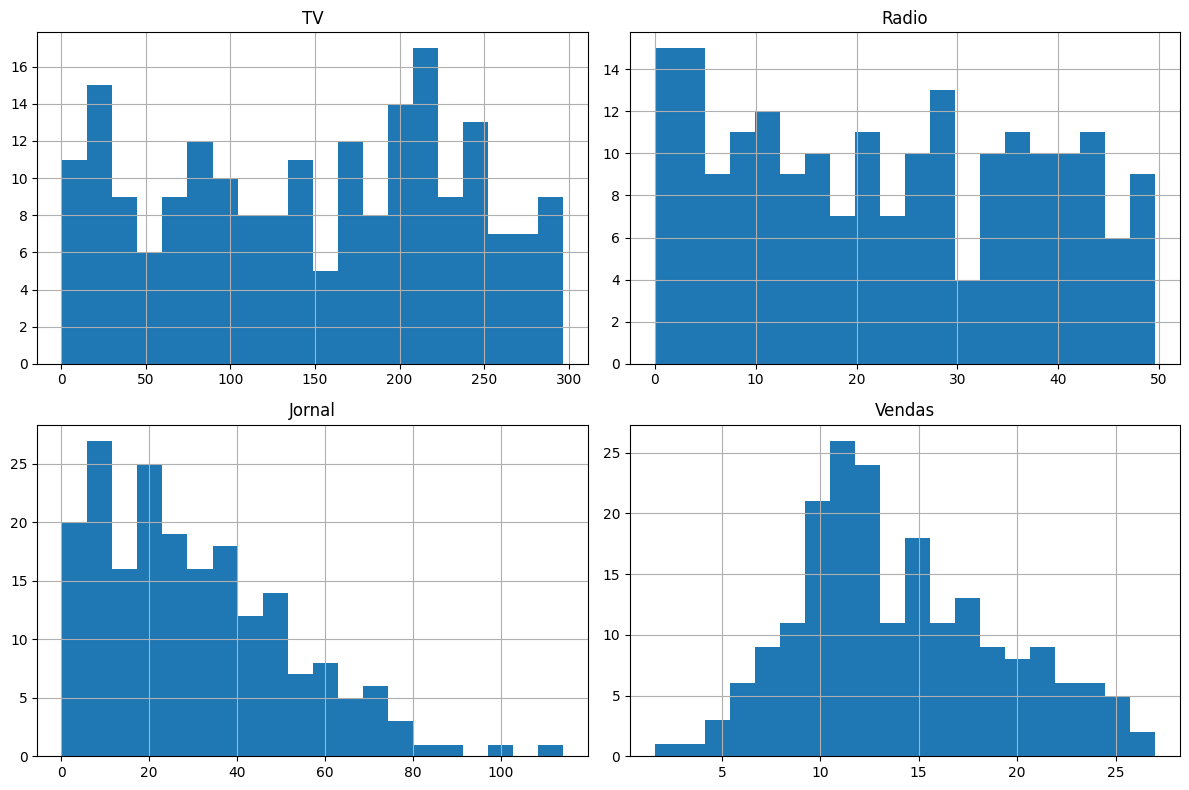

In [ ]:
# Histograma para todas as variáveis numéricas
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

 2.3 **Boxplots para identificar outliers**

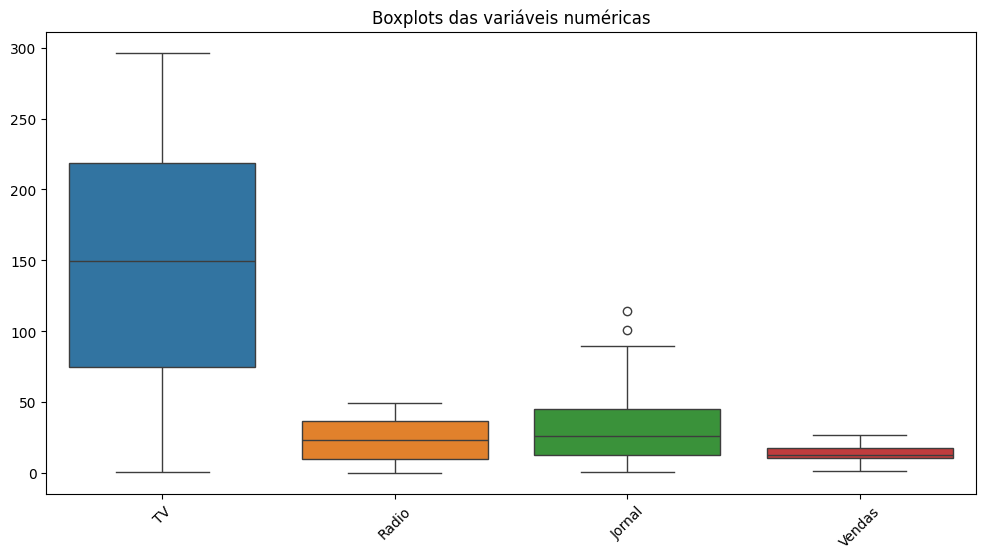

In [ ]:
# Boxplots das variáveis
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots das variáveis numéricas")
plt.show()

2.4 **Matriz de correlação**

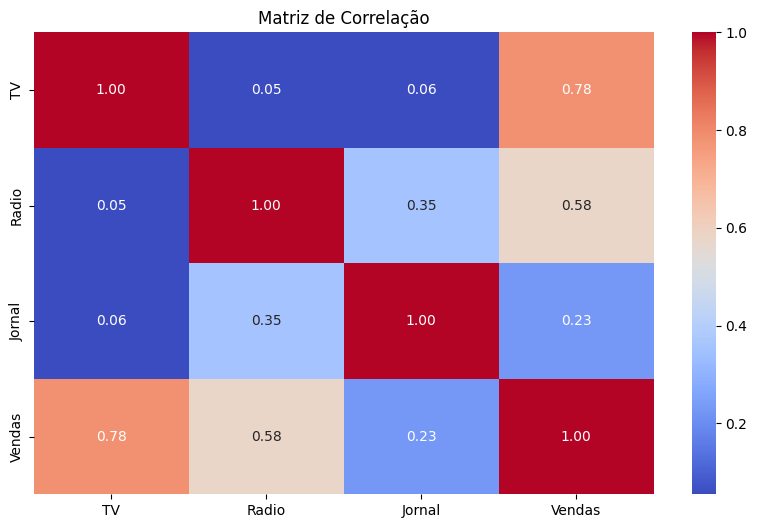

In [ ]:
# Correlação de Pearson entre as variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

2.5 **Gráfico de dispersão entre variáveis**

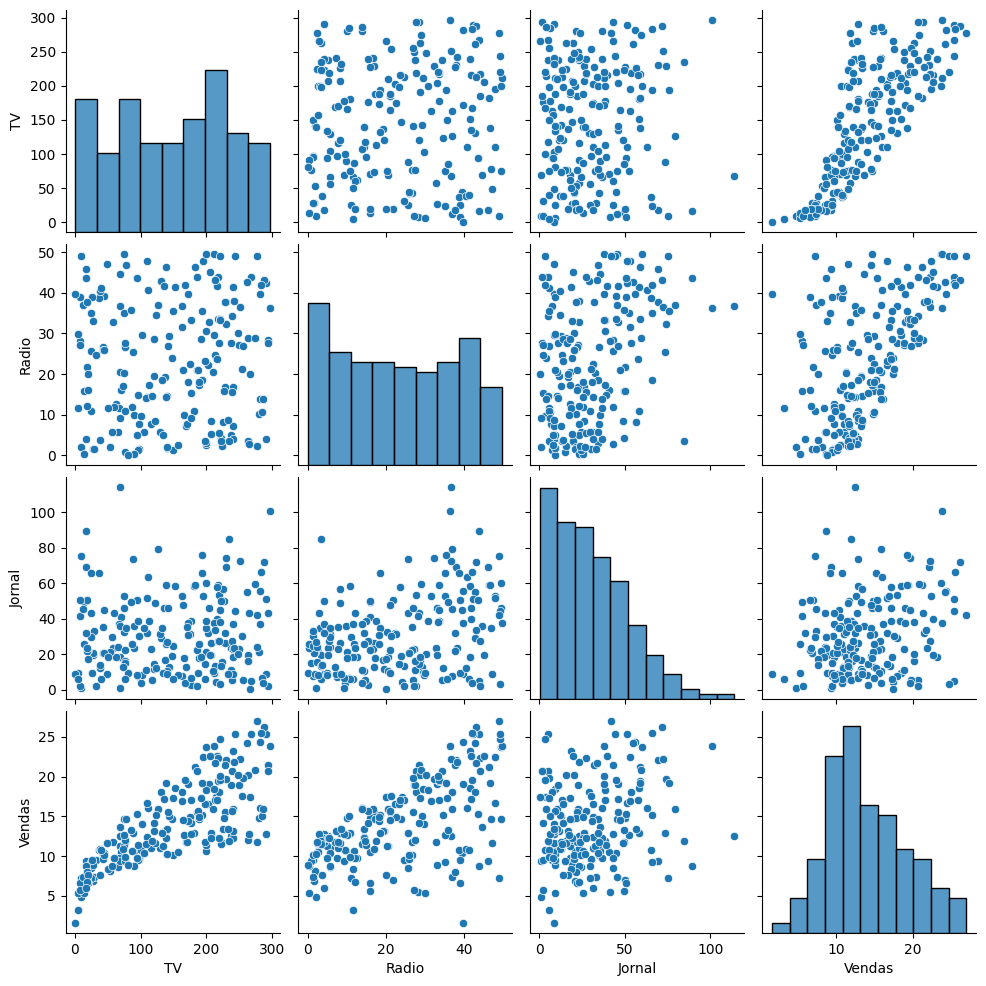

In [ ]:
# Pairplot entre variáveis (útil para identificar padrões e linearidade)
sns.pairplot(df)
plt.show()

 2.6 **Verificar valores únicos por coluna** (útil para encontrar variáveis categóricas)

In [ ]:
df.nunique()

,0
TV,190
Radio,167
Jornal,172
Vendas,121


### **Etapa 3: Ajuste dos Modelos Candidatos**

In [ ]:
# Variável dependente
y = df['Vendas']

# Modelo 1: TV + Radio + Jornal
X1 = df[['TV', 'Radio', 'Jornal']]
X1_const = sm.add_constant(X1)
modelo1 = sm.OLS(y, X1_const).fit()

# Modelo 2: TV + Radio
X2 = df[['TV', 'Radio']]
X2_const = sm.add_constant(X2)
modelo2 = sm.OLS(y, X2_const).fit()

### **Etapa 4: Ajuste e comparação dos modelos**

In [ ]:
# Predições dos dois modelos
y_pred1 = modelo1.predict(X1_const)
y_pred2 = modelo2.predict(X2_const)

# Função para calcular as métricas de comparação
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calcular_metricas(y_true, y_pred, modelo):
    return {
        'R²': modelo.rsquared,
        'R² Ajustado': modelo.rsquared_adj,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'AIC': modelo.aic,
        'BIC': modelo.bic
    }

# Calculando as métricas
metricas_m1 = calcular_metricas(y, y_pred1, modelo1)
metricas_m2 = calcular_metricas(y, y_pred2, modelo2)

# Comparando os modelos lado a lado
comparacao = pd.DataFrame([metricas_m1, metricas_m2],
                          index=['Modelo 1 (TV + Radio + Jornal)', 'Modelo 2 (TV + Radio)'])

# Exibindo os resultados
print("Comparação entre os modelos:")
display(comparacao)

Comparação entre os modelos:


,R²,R² Ajustado,MAE,MSE,AIC,BIC
Modelo 1 (TV + Radio + Jornal),0.897211,0.895637,1.252011,2.784126,780.362236,793.555505
Modelo 2 (TV + Radio),0.897194,0.896151,1.253747,2.784570,778.394099,788.289051


### **Etapa 5: Verificação das premissas: - Modelo 1 (TV + Radio + Jornal)**

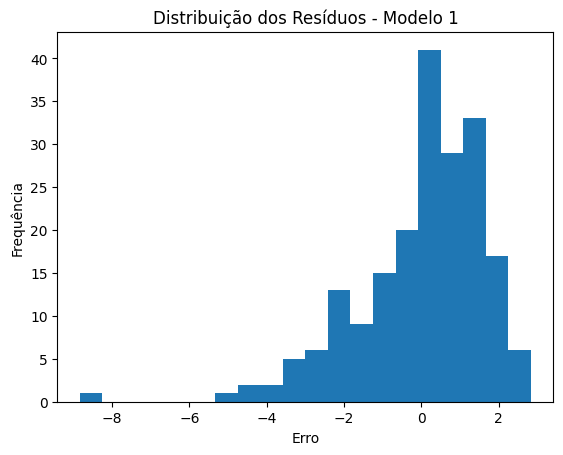

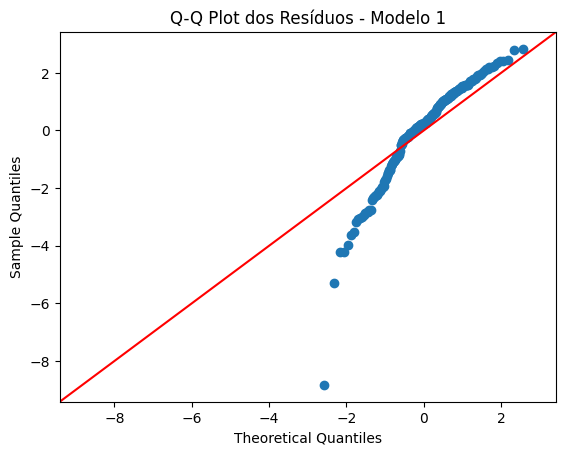

Shapiro-Wilk: estatística = 0.9177, p-valor = 0.0000
⚠️ Os resíduos NÃO seguem distribuição normal.


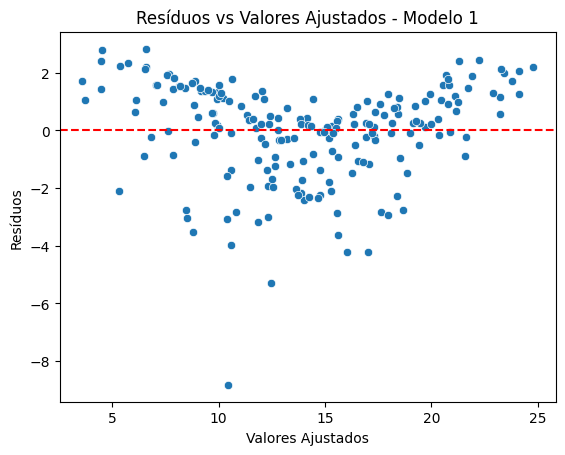

Breusch-Pagan: estatística = 5.1329, p-valor = 0.1623
✅ Homocedasticidade verificada.

VIF - Modelo 1
  variável       VIF
0       TV  2.486772
1    Radio  3.285462
2   Jornal  3.055245


In [ ]:
# Resíduos e valores ajustados
residuos1 = modelo1.resid
ajustado1 = modelo1.fittedvalues

# Histograma dos resíduos
plt.hist(residuos1, bins=20)
plt.title("Distribuição dos Resíduos - Modelo 1")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()

# Q-Q Plot
sm.qqplot(residuos1, line='45')
plt.title("Q-Q Plot dos Resíduos - Modelo 1")
plt.show()

# Teste de Shapiro-Wilk
shapiro_stat1, shapiro_p1 = stats.shapiro(residuos1)
print(f"Shapiro-Wilk: estatística = {shapiro_stat1:.4f}, p-valor = {shapiro_p1:.4f}")
if shapiro_p1 > 0.05:
    print("✅ Os resíduos seguem distribuição normal.")
else:
    print("⚠️ Os resíduos NÃO seguem distribuição normal.")

# Resíduos vs Ajustados
sns.scatterplot(x=ajustado1, y=residuos1)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Ajustados - Modelo 1")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

# Teste de Breusch-Pagan
bp_test1 = het_breuschpagan(residuos1, X1_const)
print(f"Breusch-Pagan: estatística = {bp_test1[0]:.4f}, p-valor = {bp_test1[1]:.4f}")
if bp_test1[1] > 0.05:
    print("✅ Homocedasticidade verificada.")
else:
    print("⚠️ Heterocedasticidade detectada.")

# VIF - multicolinearidade
vif_m1 = pd.DataFrame()
vif_m1['variável'] = X1.columns
vif_m1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print("\nVIF - Modelo 1")
print(vif_m1)

### **Verificação das Premissas - Modelo 2 (TV + Radio)**

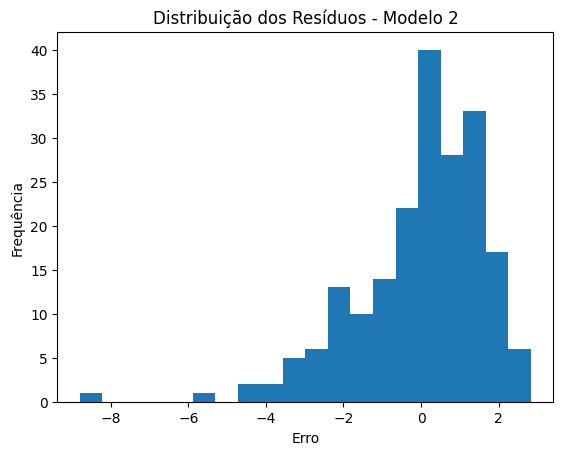

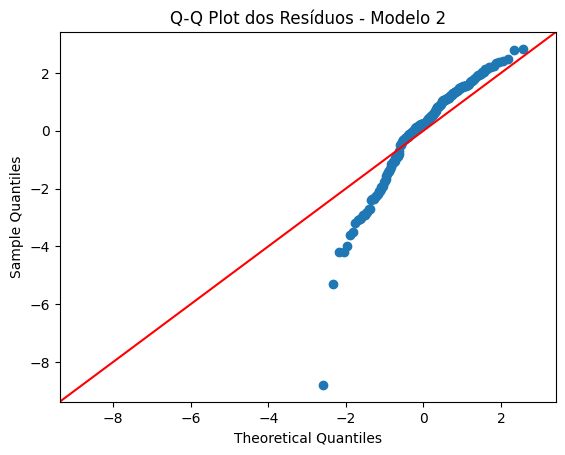

Shapiro-Wilk: estatística = 0.9180, p-valor = 0.0000
⚠️ Os resíduos NÃO seguem distribuição normal.


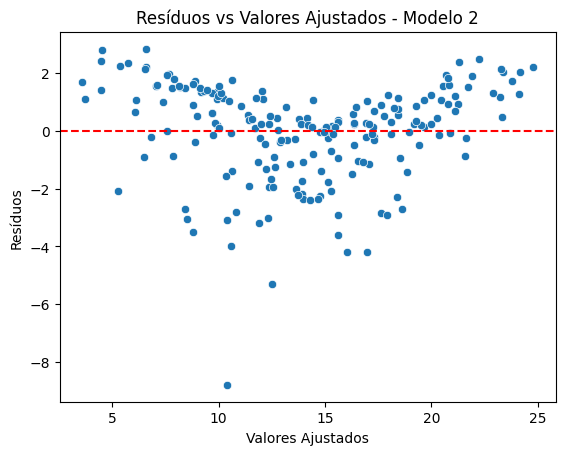

Breusch-Pagan: estatística = 4.8093, p-valor = 0.0903
✅ Homocedasticidade verificada.

VIF - Modelo 2
  variável       VIF
0       TV  2.238085
1    Radio  2.238085


In [ ]:
# Resíduos e valores ajustados
residuos2 = modelo2.resid
ajustado2 = modelo2.fittedvalues

# Histograma dos resíduos
plt.hist(residuos2, bins=20)
plt.title("Distribuição dos Resíduos - Modelo 2")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()

# Q-Q Plot
sm.qqplot(residuos2, line='45')
plt.title("Q-Q Plot dos Resíduos - Modelo 2")
plt.show()

# Teste de Shapiro-Wilk
shapiro_stat2, shapiro_p2 = stats.shapiro(residuos2)
print(f"Shapiro-Wilk: estatística = {shapiro_stat2:.4f}, p-valor = {shapiro_p2:.4f}")
if shapiro_p2 > 0.05:
    print("✅ Os resíduos seguem distribuição normal.")
else:
    print("⚠️ Os resíduos NÃO seguem distribuição normal.")

# Resíduos vs Ajustados
sns.scatterplot(x=ajustado2, y=residuos2)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Ajustados - Modelo 2")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

# Teste de Breusch-Pagan
bp_test2 = het_breuschpagan(residuos2, X2_const)
print(f"Breusch-Pagan: estatística = {bp_test2[0]:.4f}, p-valor = {bp_test2[1]:.4f}")
if bp_test2[1] > 0.05:
    print("✅ Homocedasticidade verificada.")
else:
    print("⚠️ Heterocedasticidade detectada.")

# VIF - multicolinearidade
vif_m2 = pd.DataFrame()
vif_m2['variável'] = X2.columns
vif_m2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print("\nVIF - Modelo 2")
print(vif_m2)

### **Etapa 6: Conclusão (modelo escolhido + interpretação)**

###  Comparação das Premissas — Modelo 1 vs Modelo 2

Após o ajuste dos dois modelos de regressão linear múltipla, foram verificados os principais pressupostos estatísticos: normalidade dos resíduos, homocedasticidade e ausência de multicolinearidade.

####  Modelo 1 (TV + Radio + Jornal)

- **Normalidade dos resíduos**:  Não foi atendida (Shapiro-Wilk com p-valor < 0.05)
- **Homoscedasticidade**: Verificada (Breusch-Pagan com p-valor > 0.05)
- **Multicolinearidade**: Não detectada (VIF < 5 para todas as variáveis)

####  Modelo 2 (TV + Radio)

- **Normalidade dos resíduos**: Também não atendida (Shapiro-Wilk com p-valor < 0.05)
- **Homoscedasticidade**: Verificada (Breusch-Pagan com p-valor > 0.05)
- **Multicolinearidade**: Não detectada (VIF < 5)

---

#### Conclusão:
Ambos os modelos apresentaram **boa adequação quanto à homocedasticidade e multicolinearidade**, mas **violaram a premissa de normalidade dos resíduos**. No entanto, como essa violação não compromete diretamente a capacidade preditiva do modelo, o **Modelo 2 (TV + Radio)** segue sendo o mais recomendado, por ser mais **parcimonioso** e apresentar desempenho equivalente ao Modelo 1, com menor complexidade.